In [11]:
%matplotlib inline
%pylab inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize

from inforet_package.preprocessing import *
from inforet_package.ensembler import *
from inforet_package.plotting import *
from inforet_package.vectorizer import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#loading data
df = pd.read_csv("../data/train.csv")

print("{} rows loaded...".format(df.shape[0]))
df = df.sample(frac=0.05)
print("{} rows sampled...".format(df.shape[0]))

1306122 rows loaded...
65306 rows sampled...


In [3]:
POS = df['question_text']\
    .progress_apply(lambda x: word_tokenize(x))\
    .progress_apply(lambda x: POSTagger(x))

In [4]:
vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
X_terms = vectorizer.fit_transform(POS)
X_terms

<65306x45 sparse matrix of type '<class 'numpy.float64'>'
	with 642558 stored elements in Compressed Sparse Row format>

In [8]:
y_pred, y_test = train_predict_svm(X_terms, df['target'], C=1)

[LibSVM]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_terms, df['target'], test_size=0.3)
#clf = svm.SVC(kernel='linear', C=C, max_iter=-1, probability=True, verbose=5)
#clf.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())

Normalized confusion matrix
Precision: 0.08094107489747464
Recall: 0.9266886326194399
F1 score: 0.14887844901740224


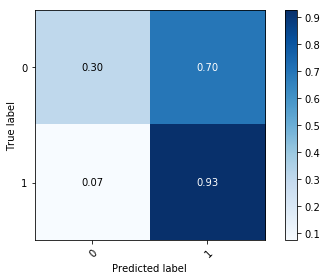

In [14]:
norm_ax, cm = plot_confusion_matrix(y_test, y_pred, [0,1],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)
print_performances(cm)